## Introduction

Fonts are one of the most **important aspects** of a good visualization. **Choosing the right font** can make a huge difference in the readability and overall quality of a chart. The goal of this post is to show how to import and use custom fonts in [Matplotlib](/matplotlib).


## Use PyFonts

[PyFonts](/pyfonts) is a python library that makes it super easy to load font for matplotlib.

You can install it with `pip install pyfonts` and then use its `load_font()` function to load any font from the web.

Check out the [dedicated post on how to use PyFonts](/pyfonts) to learn more about it!


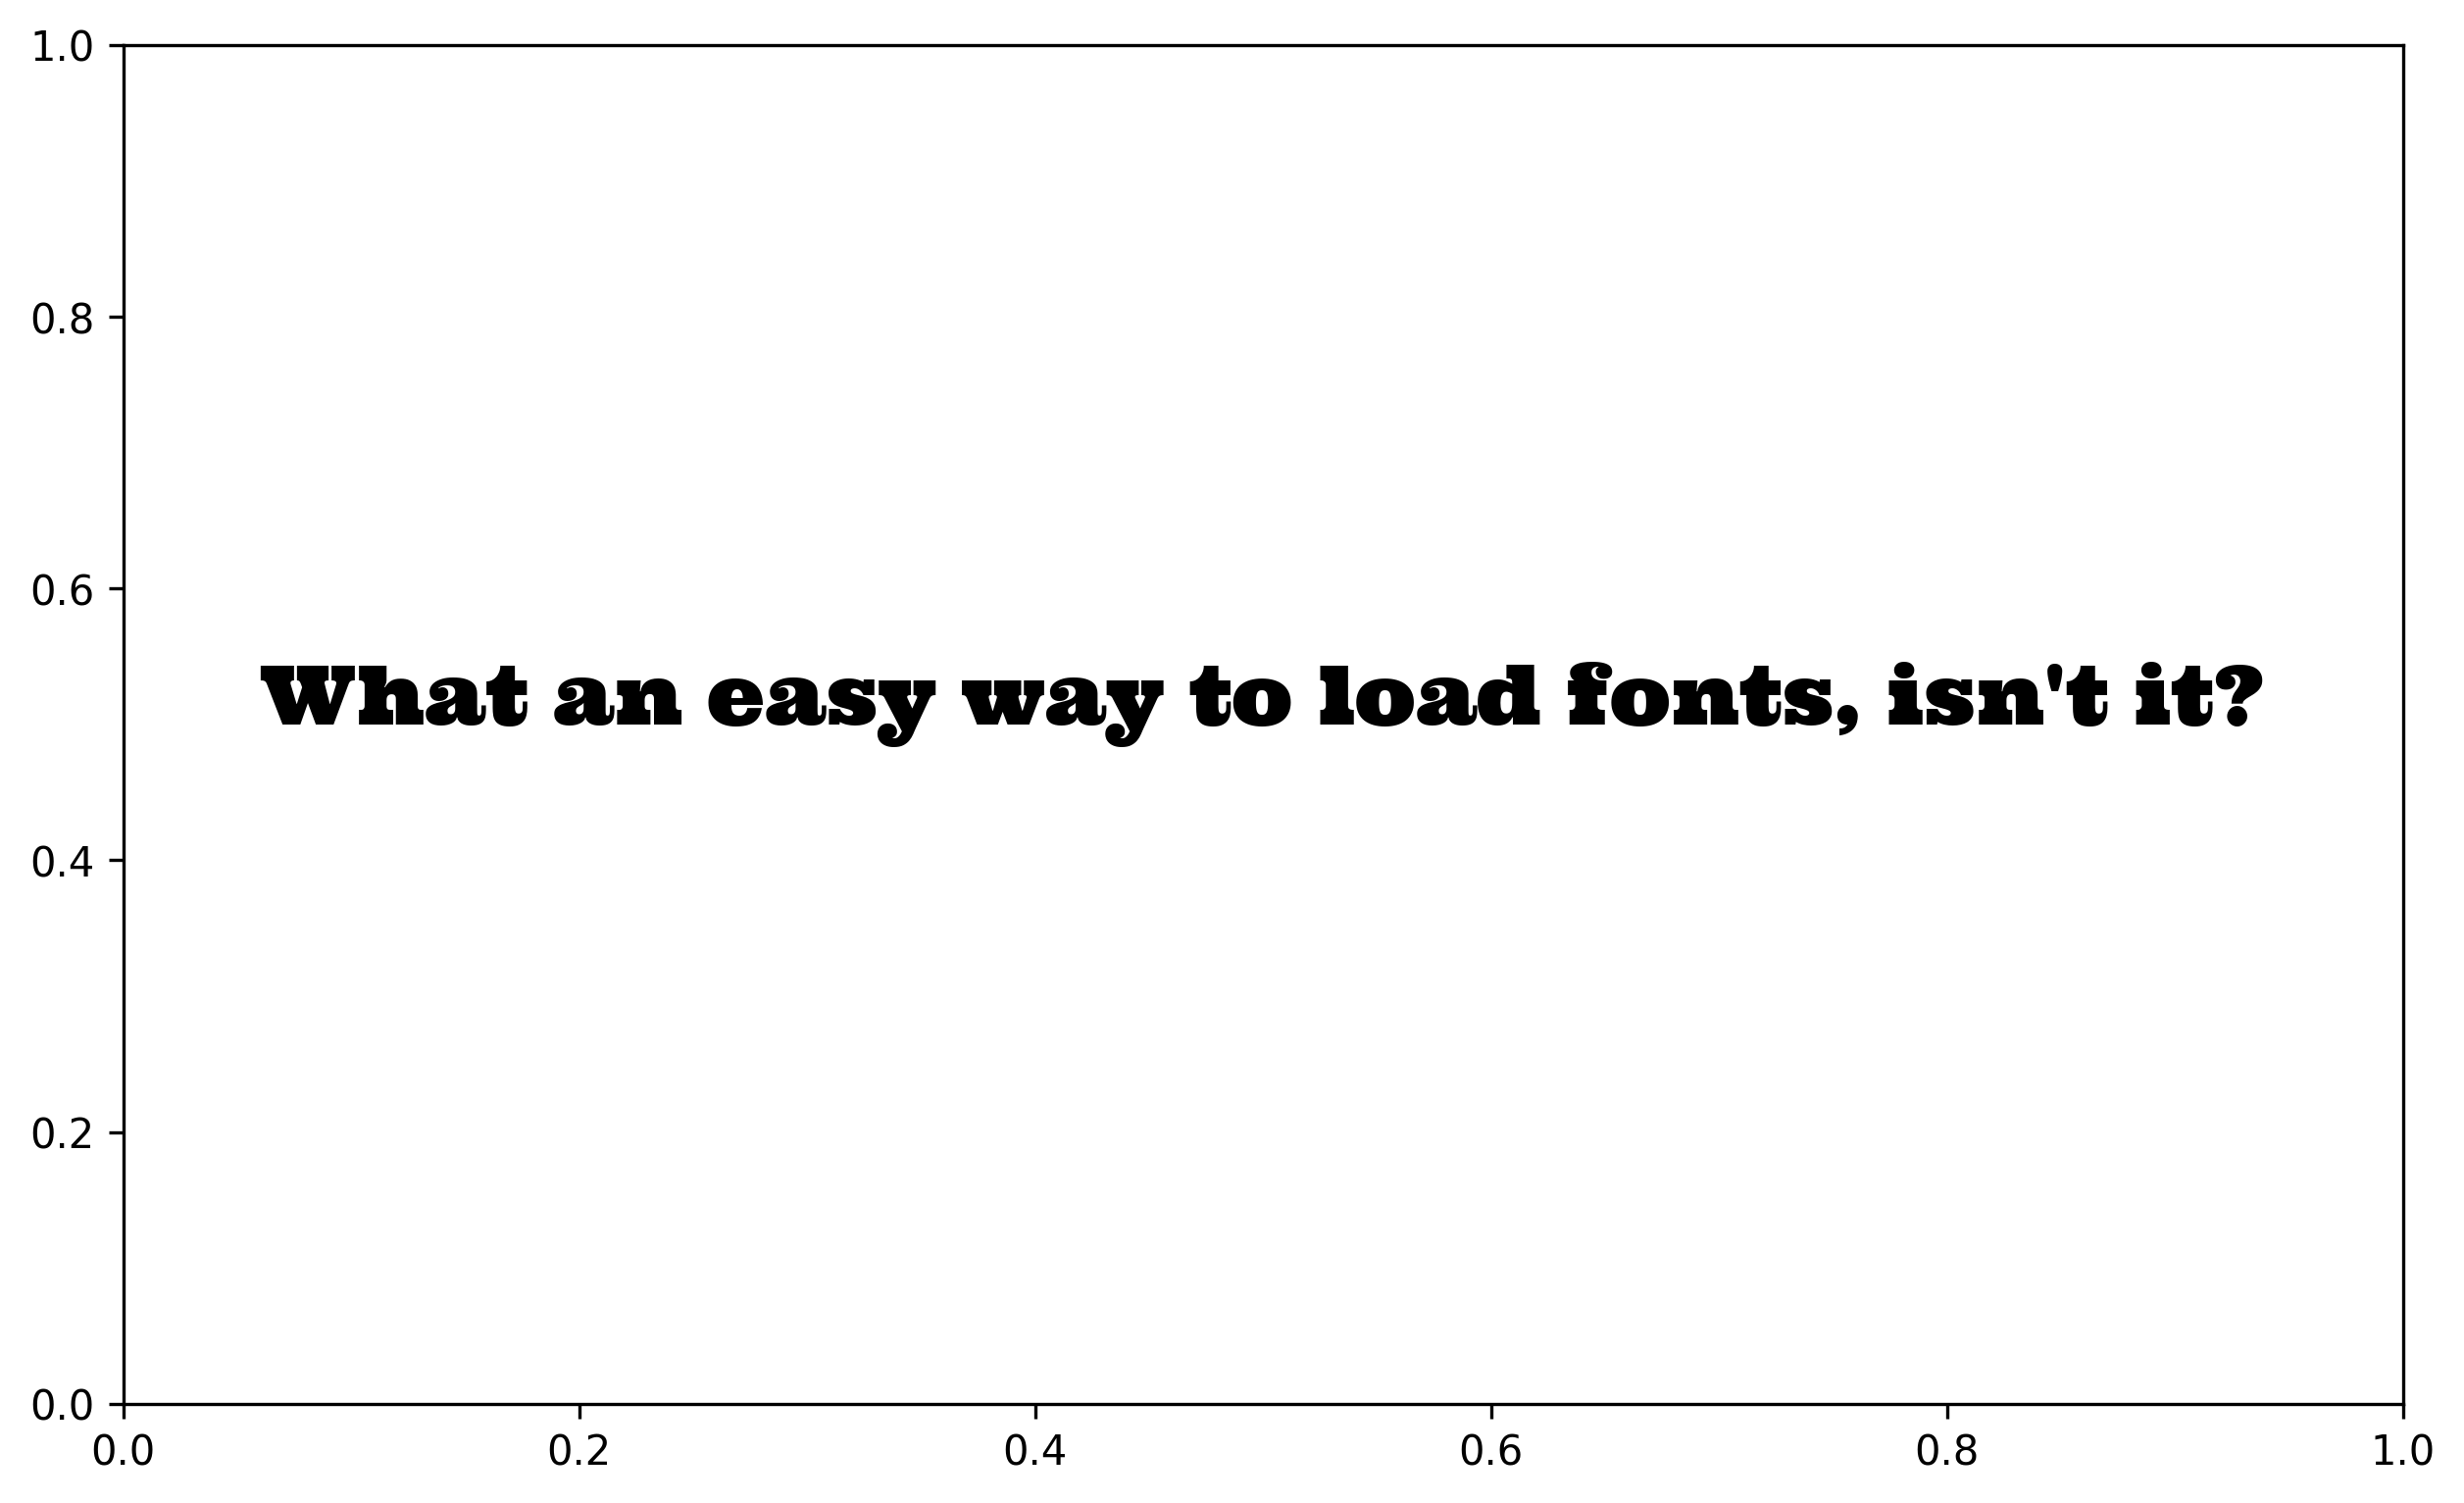

In [1]:
import matplotlib.pyplot as plt
from pyfonts import load_font

# load font
font = load_font(
   font_url="https://github.com/google/fonts/blob/main/apache/ultra/Ultra-Regular.ttf?raw=true"
)

# check how the font looks on a minimalist example
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.text(
   x=0.5,
   y=0.5,
   s=f"What an easy way to load fonts, isn't it?",
   font=font,
   fontsize=20,
   ha="center",
)
plt.show()

## Find fonts on your computer

If you want to use a font that have locally, you have to ensure it's well installed on your computer. For example, if I want to find the `Fira Sans` font on my computer, I can use the following code:


In [23]:
from matplotlib import font_manager

for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'FiraSans'.lower() in fontpath.lower():
        print(fontpath)

/Users/josephbarbier/Library/Fonts/FiraSans-ThinItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Light.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-SemiBold.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-ExtraBoldItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-BoldItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-SemiBoldItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Italic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Thin.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-BlackItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-ExtraBold.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-MediumItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-LightItalic.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Black.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Bold.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Regular.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-Medium.ttf
/Users/josephbarbier/Library/Fonts/FiraSans-ExtraLightItalic.ttf
/Users/josephb

If your prefer using your terminal, you can use the following command:

```bash
fc-list | grep "Fira"
```

This will return all the fonts that contain the word `Fira` in their name.

(You can replace `Fira` with the name of the font you are looking for)


If you don't have the font you want, you can **download it** from the internet using sites like [Google font](https://fonts.google.com/). Once downloaded, you generally will have to **double-click on the font file** (usually ending with `.ttf`, or similar) to install it on your computer.


## Define font in code

Once you have found your font path, you can **use it in your code**. For example, if I want to use the `Fira Sans` font, both in **normal and bold style**, we can use the following code:


In [24]:
from matplotlib.font_manager import FontProperties

# !!! change it to your path
personal_path = '/Users/josephbarbier/Library/Fonts/'

# get normal font and store it in `fira_sans_regular`
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans = FontProperties(fname=font_path)

# get bold font and store it in `fira_sans_bold`
font_path = personal_path + 'FiraSans-Bold.ttf'
fira_sans_bold = FontProperties(fname=font_path)

# get another font and store it in `pally_medium`
font_path = personal_path + 'Pally-Medium.otf'
pally_medium = FontProperties(fname=font_path)

The `FontProperties` function will create a font object that can be used in the `matplotlib` functions with the `fontproperties` or `font` arguments.


## Use the font in a chart

Now let's create a simple chart using the `Fira Sans` font to see how to **use it in practice**.


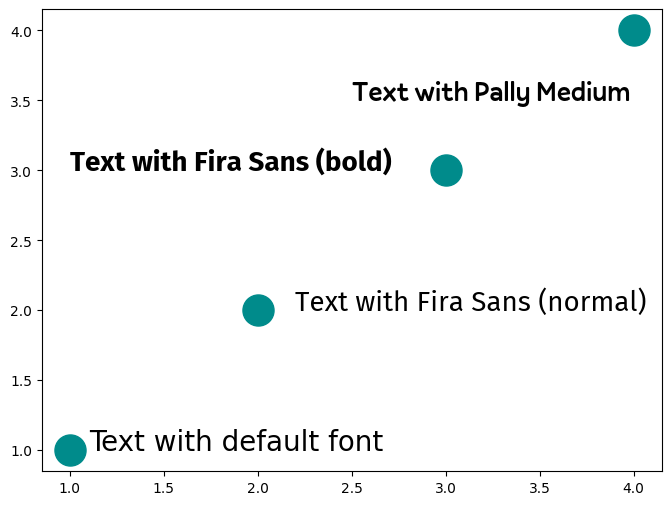

In [30]:
import matplotlib.pyplot as plt

# simple chart
plt.figure(figsize=(8, 6))
plt.scatter([1, 2, 3, 4], [1, 2, 3, 4], s=500, color="darkcyan")


plt.text(
    2.2, 2, # positions
    "Text with Fira Sans (normal)",
    font=fira_sans,
    fontsize=20
)

plt.text(
    1, 3, # positions
    "Text with Fira Sans (bold)",
    font=fira_sans_bold,
    fontsize=20
)

plt.text(
    2.5, 3.5, # positions
    "Text with Pally Medium",
    font=pally_medium,
    fontsize=20
)

plt.text(
    1.1, 1, # positions
    "Text with default font",
    fontsize=20
)

plt.show()

## Other way to define font in code

Let's take an example with other fonts:

- **Hydrophilia Iced** from [Floodfonts](https://www.floodfonts.com/). [Here](https://www.floodfonts.com/freefont/download/hydrophilia.zip) you can download a zipped folder that contains the font as both `.otf` and `.ttf` types. Make sure you install the `.ttf` version for Matplotlib.
- **Special Elite**. Available from Google Fonts [here](https://fonts.google.com/specimen/Special+Elite).

1. Download fonts from the sources listed above.
2. Install fonts on your system. Usually, double-click on the `.ttf` file and then click on the Install button in the window that pops up. Note that Matplotlib handles fonts in **True Type Format** `(.ttf)`, so make sure you install fonts ending in `.ttf`.
3. Clear matplotlib cache by running the following command on your terminal

```
rm -fr ~/.cache/matplotlib
```

4. If you're using a Jupyter notebook, this is a good time to restart it.
5. Run the following code to tell Matplotlib to look for fonts in your system (it will return a list with font paths)

```python
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
```

6. Check the fonts are accesible by Matplotlib with

```python
font_manager.findfont("Hydrophilia Iced") # Test with "Special Elite" too
```

The result should be a path to the font like the following

```
'/home/tomas/.local/share/fonts/HydrophiliaIced-Regular.ttf'
```

## What to do if it fails

If the font is unreachable by Matplotlib you will have a message like

```
findfont: Font family ['Hydrophilia Iced'] not found. Falling back to DejaVu Sans.
```

Try with adding your font into the system library.

- On OS X

```
~/Library/Fonts/
```

- On Linux

```
/usr/share/fonts/truetype
```

and also try with

```
/usr/share/fonts
```

Then, just repeat steps 2 to 6.


## Plot

Now that we've covered how to make fonts accesible by Matplotlib, it's a good time to plot something and see how these two new fonts look like!


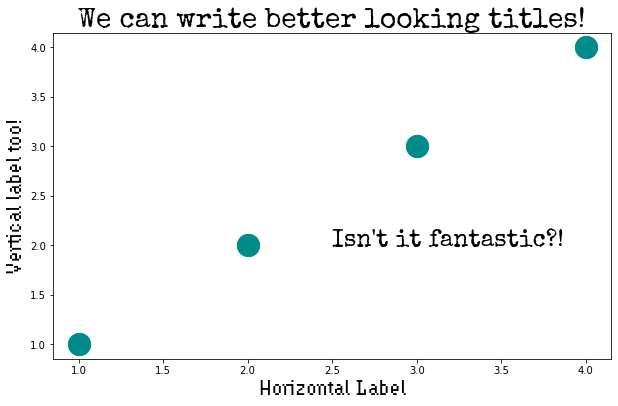

In [2]:
import matplotlib.pyplot as plt

# simple chart
plt.figure(figsize=(10, 6))
plt.scatter([1, 2, 3, 4], [1, 2, 3, 4], s=500, color="darkcyan")

# add texts
plt.text(2.5, 2, "Isn't it fantastic?!", fontname="Special Elite", fontsize=24)
plt.xlabel("Horizontal Label", fontname="Hydrophilia Iced", fontsize=20)
plt.ylabel("Vertical label too!", fontname="Hydrophilia Iced", fontsize=20)
plt.title("We can write better looking titles!", fontsize=28,fontname="Special Elite");

## Going further

This post explains how to use custom fonts in [matplotlib](/matplotlib).

You might be interested in [this chart](/web-ridgeline-by-text) that uses custom font in a real life example, and more generally how to [customize annotations](/advanced-custom-annotations-matplotlib)
